In [56]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from pprint import pprint
import scipy.stats as stats

In [57]:
sleep_health_df = pd.read_csv('../Resources/Sleep_health_and_lifestyle_dataset.csv')
sleep_health_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


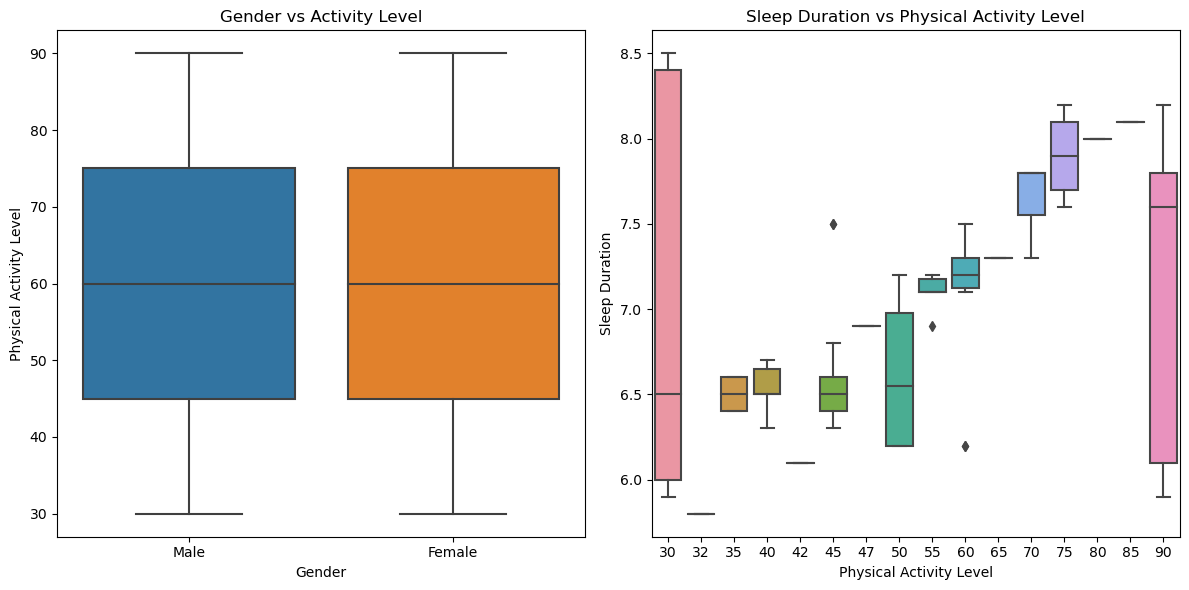

In [58]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Box plot for Gender vs Activity Level
plt.subplot(1, 2, 1)  # Create a subplot for Daily Steps
sns.boxplot(x='Gender', y='Physical Activity Level', data=sleep_health_df)
plt.title('Gender vs Activity Level')

# Box plot for Activity Level vs Sleep
plt.subplot(1, 2, 2)  # Create a subplot for Average Sleep
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=sleep_health_df)
plt.title('Sleep Duration vs Physical Activity Level')

plt.tight_layout()  
plt.show()

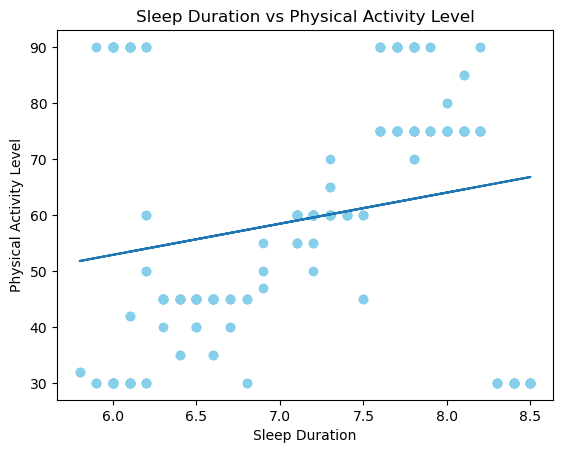

In [83]:
x_axis = sleep_health_df['Sleep Duration']
y_axis = sleep_health_df['Physical Activity Level']

plt.scatter(x_axis, y_axis,color='skyblue', marker="o")
plt.xlabel("Sleep Duration")
plt.ylabel("Physical Activity Level")
plt.title("Sleep Duration vs Physical Activity Level")
m, b = np.polyfit(x_axis, y_axis, 1)
plt.plot(x_axis, m*x_axis+b)
plt.show()

In [50]:
sleep_health_df = sleep_health_df.rename(columns={"Physical Activity Level": "Physical_Activity_Level", "Sleep Duration": "Sleep_Duration","Stress Level": "Stress_Level", "Quality of Sleep": "Quality_of_Sleep","Daily Steps":"Daily_Steps"})
sleep_health_df

,Person ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI Category,Blood Pressure,Heart Rate,Daily_Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [47]:
#Run a T-Test for Male and Female to determine if statistically different Physical Activity Levels
Male_Population = sleep_health_df[sleep_health_df["Gender"] == "Male"]
Male_Population.Physical_Activity_Level.mean()
Female_Population = sleep_health_df[sleep_health_df["Gender"] == "Female"]
Female_Population.Physical_Activity_Level.mean()
stats.ttest_ind(Male_Population.Physical_Activity_Level, Female_Population.Physical_Activity_Level, equal_var=False)

TtestResult(statistic=0.028048144471380786, pvalue=0.9776388132184118, df=371.503109029532)

In [48]:
#Run a T-Test for Male and Female to determine if statistically different Sleep Duration
Male_Population = sleep_health_df[sleep_health_df["Gender"] == "Male"]
Male_Population.Sleep_Duration.mean()
Female_Population = sleep_health_df[sleep_health_df["Gender"] == "Female"]
Female_Population.Sleep_Duration.mean()
stats.ttest_ind(Male_Population.Sleep_Duration, Female_Population.Sleep_Duration, equal_var=False)

TtestResult(statistic=-2.356536840262248, pvalue=0.01899771159242428, df=349.38339964700856)

In [49]:
#Run a T-Test for Male and Female to determine if statistically different Quality of Sleep
Male_Population = sleep_health_df[sleep_health_df["Gender"] == "Male"]
Male_Population.Quality_of_Sleep.mean()
Female_Population = sleep_health_df[sleep_health_df["Gender"] == "Female"]
Female_Population.Quality_of_Sleep.mean()
stats.ttest_ind(Male_Population.Quality_of_Sleep, Female_Population.Quality_of_Sleep, equal_var=False)

TtestResult(statistic=-5.859317976055214, pvalue=1.078122839334259e-08, df=347.95579825488045)

In [51]:
#Run a T-Test for Male and Female to determine if statistically different Daily Steps
Male_Population = sleep_health_df[sleep_health_df["Gender"] == "Male"]
Male_Population.Daily_Steps.mean()
Female_Population = sleep_health_df[sleep_health_df["Gender"] == "Female"]
Female_Population.Daily_Steps.mean()
stats.ttest_ind(Male_Population.Daily_Steps, Female_Population.Daily_Steps, equal_var=False)

TtestResult(statistic=-0.27944651832494843, pvalue=0.7800616765581089, df=362.2052568980081)